<a href="https://colab.research.google.com/github/DevCarolSantos/Pratique/blob/main/Exerc%C3%ADcio_Completo_An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução ao estudo realizado

**Análise Exploratória de Dados: Aluguel em diferentes cidades do Brasil**

**Objetivos:**
*   Estudar os dados do dataset
*   Limpar e tratar os dados
*   Realizar uma análise exploratória dos dados

**Conteúdo do dataset:**

Este dataset traz informações sobre aluguéis de imóveis em diferentes cidades do Brasil, incluindo as características dos imóveis e seus custos.

Vale ressaltar que época em que estes dados foram coletados foi no ano de 2020.

Endereço para download do dataset: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent

**Significado de cada coluna do dataset:**

1. City (str) = Cidade onde o imóvel está localizado;
2. Area (int) = Área do imóvel;
3. Rooms (int) = Quantidade de cômodos que o imóvel possui;
4. Bathroom (int) = Quantidade de banheiros que o imóvel possui;
5. Parking Spaces (int) = Quantidade de vagas de estacionamento que o imóvel tem direito;
6. Floor (int) = Andar em que está localizado o imóvel;
7. Animal (str) = Se é aceito ou não animais dentro do imóvel;
8. Furniture (str) = Se é mobiliado ou não o imóvel;
9. HOA (int) = Valor do condomínio caso estiver o imóvel estiver implantado em condomínio;
10. Rent Amount (int) = Valor do aluguel do imóvel;
11. Property Tax (int) = Valor do Imposto sobre a Propriedade Predial e Territorial Urbana;
12. Fire Insurance (int) = Valor do Seguro Incêndio;
13. Total (int) = Valor total do custo para locação do imóvel.



---










# Visualizando os tipos de dados, tratando e gerando cálculos de estatística descritiva

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Estas são as primeiras 10 linhas de dados do dataset, é possível observar que cada linha tem dados sobre a área, quantidade de quartos, banheiros e vagas de garagem, em qual andar está localizado o imóvel (caso seja apartamento), se é mobiliado ou
não, e ainda, seus respectivos custos além do aluguel.

In [ ]:
houses = pd.read_csv('houses.csv')
houses.head(10)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


* Neste método verificamos que não há dados nulos e que os tipos de dados são divididos entre strings e inteiros:

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


*   Para melhor visualização foi renomeada os nomes das colunas:

In [ ]:
houses = houses.rename(columns={
'city':'City',
'area':'Area',
'rooms':'Rooms',
'bathroom':'Bathroom',
'parking spaces':'Parking Spaces',
'floor':'Floor',
'animal':'Animal',
'furniture':'Furniture',
'hoa (R$)':'HOA (R$)',
'rent amount (R$)':'Rent Amount (R$)',
'property tax (R$)':'Property Tax (R$)',
'fire insurance (R$)':'Fire Insurance (R$)',
'total (R$)':'Total (R$)'})

* Ao executar o método *describe*, nota-se que a média da área dos imóveis do conjunto de dados é 149m² e acompanha um desvio padrão de 537.01, com a área mínima de 11m² e máxima de 46335.00m². Percebe-se também dispersões parecidas nas colunas Rent Amount e Property Tax, dados que devem ser melhor explorados mais à diante.


In [ ]:
houses.describe()

,Area,Rooms,Bathroom,Parking Spaces,HOA (R$),Rent Amount (R$),Property Tax (R$),Fire Insurance (R$),Total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


# Modelando os dados para analisar variáveis categóricas e gerando gráficos de barras para melhor visualização

In [ ]:
animal = houses['Animal'].value_counts(normalize=True)*100
animal

Animal
acept        77.777778
not acept    22.222222
Name: proportion, dtype: float64

In [ ]:
city_animal = houses.groupby('City')['Animal'].value_counts(normalize=True)*100
city_animal

City            Animal   
Belo Horizonte  acept        74.006359
                not acept    25.993641
Campinas        acept        81.242673
                not acept    18.757327
Porto Alegre    acept        84.241408
                not acept    15.758592
Rio de Janeiro  acept        80.279813
                not acept    19.720187
São Paulo       acept        76.133854
                not acept    23.866146
Name: proportion, dtype: float64



*   Após realizarmos um agrupamento dos dados presente na coluna Animal com a coluna City como referência e quantificá-los, criamos uma simples tabela para posteriormente visualizarmos os dados em um gráfico de barras.



In [ ]:
City_animal = city_animal.unstack(1).round(1)
City_animal

Animal,acept,not acept
City,,
Belo Horizonte,74.0,26.0
Campinas,81.2,18.8
Porto Alegre,84.2,15.8
Rio de Janeiro,80.3,19.7
São Paulo,76.1,23.9


* Verificamos no gráfico que a cidade em que é mais aceito animais de estimação nos imóveis é Porto Alegre com 84,20% e onde menos é aceito é em Belo Horizonte com 74,00% de liberação dos pets nas casas.

  A príncipio, é possível observarmos que não há significativa disparidade quanto a quantidade de imóveis em que é permitido o acesso de animais.



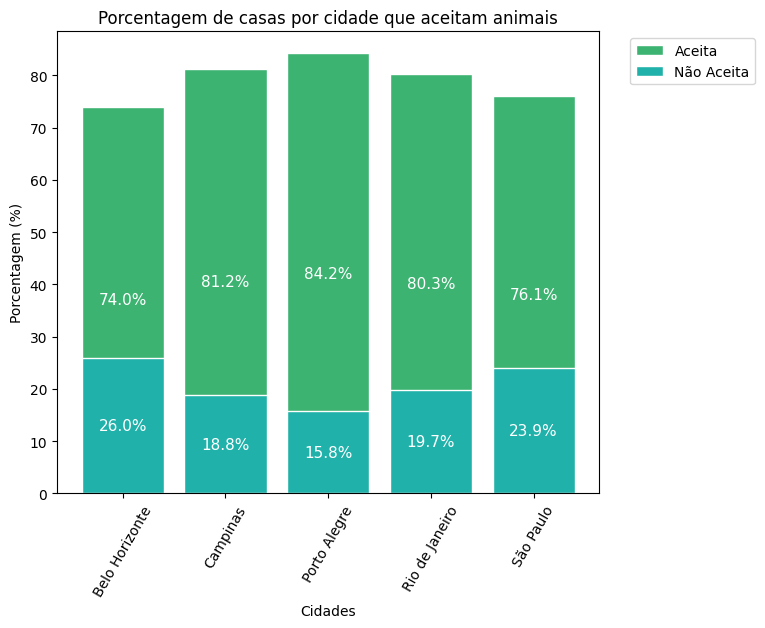

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
width = 0.80

#gráfico de barras empilhado
bar1 = ax.bar(City_animal.index,City_animal['acept'],width,color='mediumseagreen',edgecolor='white',label='Aceita')

bar2 = ax.bar(City_animal.index,City_animal['not acept'],width,color="lightseagreen",edgecolor='white',label='Não Aceita')

#atributos do gráfico
ax.set_ylabel('Porcentagem (%)')
ax.set_xlabel('Cidades')
ax.set_title('Porcentagem de casas por cidade que aceitam animais')
plt.xticks(rotation=60,horizontalalignment='center')
ax.legend(loc='upper right',bbox_to_anchor=(1.3,1))

#adicionando rótulos dos valores nas barras
ax.bar_label(bar1,(str(i)+ '%' for i in City_animal['acept']),
                label_type='center',color='white',fontsize=11)
ax.bar_label(bar2,(str(i)+ '%' for i in City_animal['not acept']),
                label_type='center',color='white',fontsize=11)

plt.show()

In [ ]:
furniture = houses['Furniture'].value_counts(normalize=True)*100
furniture

Furniture
not furnished    75.626637
furnished        24.373363
Name: proportion, dtype: float64

In [ ]:
city_furniture = houses.groupby('City')['Furniture'].value_counts(normalize=True)*100
city_furniture

City            Furniture    
Belo Horizonte  not furnished    85.930048
                furnished        14.069952
Campinas        not furnished    86.987104
                furnished        13.012896
Porto Alegre    not furnished    73.260687
                furnished        26.739313
Rio de Janeiro  not furnished    72.951366
                furnished        27.048634
São Paulo       not furnished    72.940377
                furnished        27.059623
Name: proportion, dtype: float64



*   Foi realizado o mesmo método para a quantificação da proporção de imóveis mobiliados e não mobiliados, com a criação da tabela e gráfico:



In [ ]:
City_furniture = city_furniture.unstack(1).round(1)
City_furniture

Furniture,furnished,not furnished
City,,
Belo Horizonte,14.1,85.9
Campinas,13.0,87.0
Porto Alegre,26.7,73.3
Rio de Janeiro,27.0,73.0
São Paulo,27.1,72.9


* Verificamos no gráfico que a cidade em que há mais imóveis mobiliados é Campinas com 87,00% e onde tem menos imóveis mobiliados é em São Paulo, com apenas 72,90% das casas mobiliadas.


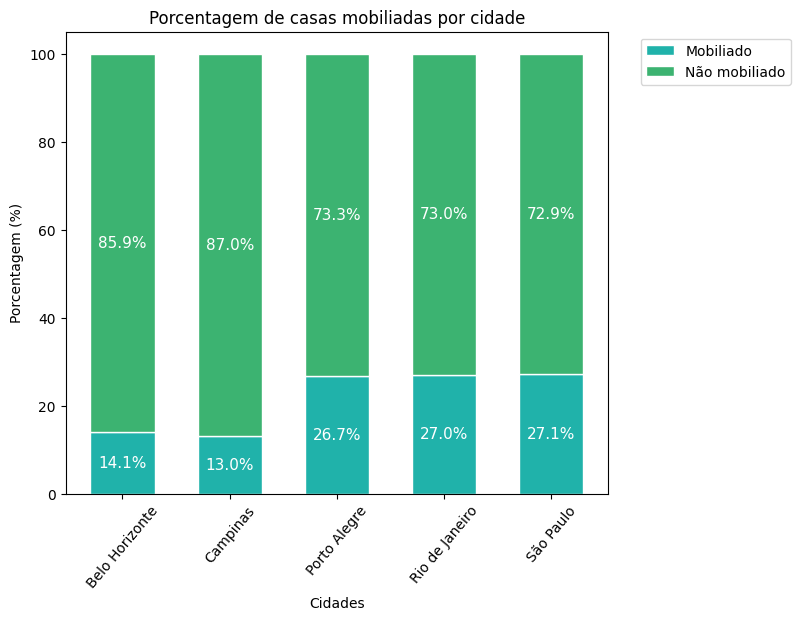

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
width = 0.6

#gráfico de barras empilhado
bar3 = ax.bar(City_furniture.index,City_furniture['furnished'],width,color='lightseagreen',edgecolor='white',label='Mobiliado')

bar4 = ax.bar(City_furniture.index,City_furniture['not furnished'],width,color='mediumseagreen',edgecolor='white',bottom=City_furniture['furnished'],label='Não mobiliado')

#atributos do gráfico
ax.set_ylabel('Porcentagem (%)')
ax.set_xlabel('Cidades')
ax.set_title('Porcentagem de casas mobiliadas por cidade')
plt.xticks(rotation=50,horizontalalignment='center')
ax.legend(loc='upper right',bbox_to_anchor=(1.35,1))

#adicionando rótulos dos valores nas barras
ax.bar_label(bar3,(str(i)+ '%' for i in City_furniture['furnished']),
                label_type='center',color='white',fontsize=11)
ax.bar_label(bar4,(str(i)+ '%' for i in City_furniture['not furnished']),
                label_type='center',color='white',fontsize=11)

plt.show()


# Identificando outliers através do Método Interquartil

* Para evitar resultados imprecisos, a partir deste bloco de código, identificaremos outliers nos dados da coluna *Area*, uma vez que constatamos um alto desvio padrão nesta coluna, e entendendo do assunto, a metragem pode ter altos desvios já que existem imóveis com áreas muito pequenas ou muito grandes em menor quantidade para locação, variando de acordo com as características urbanísticas de cada município. Portanto, removendo os outliers, estaremos trabalhando com os dados de imóveis que realmente aquecem o mercado imobiliário. Para isso, utilizamos o Método Interquartil:


In [ ]:
#Identificando outliers através do método interquartil

q1 = houses['Area'].quantile(0.25)
q3 = houses['Area'].quantile(0.75)

IQR = q3 - q1

print(f'IQR: {IQR}')



IQR: 126.0


In [ ]:
houses_outliers = houses[(houses['Area'] < q1 - (IQR * 1.5)) | (houses['Area'] > q3 + (IQR * 1.5))]
houses_outliers

,City,Area,Rooms,Bathroom,Parking Spaces,Floor,Animal,Furniture,HOA (R$),Rent Amount (R$),Property Tax (R$),Fire Insurance (R$),Total (R$)
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
86,São Paulo,600,4,4,4,9,acept,not furnished,7400,8500,3368,108,19380
105,Belo Horizonte,400,4,2,2,-,not acept,not furnished,0,2500,74,41,2615
131,São Paulo,900,4,6,8,-,acept,not furnished,0,15000,4417,226,19640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,Belo Horizonte,500,8,5,8,-,acept,not furnished,0,5000,150,82,5232
10611,Campinas,411,4,5,4,-,acept,not furnished,0,5500,667,83,6250
10620,Rio de Janeiro,400,4,4,2,-,acept,not furnished,2000,15000,917,229,18150
10630,São Paulo,380,3,5,4,-,acept,not furnished,0,5500,1200,83,6783


In [ ]:
houses_inliers = houses[(houses['Area'] >= q1 - (IQR * 1.5)) & (houses['Area'] <= q3 + (IQR * 1.5))]
houses_inliers.head(10)

,City,Area,Rooms,Bathroom,Parking Spaces,Floor,Animal,Furniture,HOA (R$),Rent Amount (R$),Property Tax (R$),Fire Insurance (R$),Total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747


# Análise de dados: estudando o novo conjunto de dados gerado após identificação dos outliers

* Depois de remover os outliers, temos um novo conjunto de dados e refazendo a análise da estatística descritiva, observamos então de imediato a queda do desvio padrão da variável *Area* e como o valor da *max* agora atinge uma metragem que é mais encontrada no cenário imobiliário.

In [ ]:
houses_inliers.describe()

,Area,Rooms,Bathroom,Parking Spaces,HOA (R$),Rent Amount (R$),Property Tax (R$),Fire Insurance (R$),Total (R$)
count,10020.000000,10020.000000,10020.000000,10020.000000,1.002000e+04,10020.000000,10020.000000,10020.000000,1.002000e+04
mean,116.064770,2.387525,2.064571,1.430140,1.150773e+03,3514.389920,299.498403,47.453293,5.012321e+03
std,82.894232,1.073236,1.223062,1.378332,1.609440e+04,2988.684356,3175.356056,40.532033,1.685653e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,2.300000e+02,1500.000000,34.000000,20.000000,1.997000e+03
50%,85.000000,2.000000,2.000000,1.000000,5.710000e+02,2500.000000,112.000000,33.000000,3.349000e+03
75%,160.000000,3.000000,3.000000,2.000000,1.200000e+03,4446.250000,317.000000,59.000000,6.017250e+03
max,370.000000,10.000000,9.000000,10.000000,1.117000e+06,30000.000000,313700.000000,451.000000,1.120000e+06


* Para obtermos uma visão geral quanto a proporção de imóveis, criou-se um gráfico de barras identificando a quantidade de imóveis disponíveis para locação em cada cidade do dataset. Logo, percebemos a liderança na disponibilidade de moradias na capital do estado de São Paulo.

Text(0, 0.5, 'Cidade')

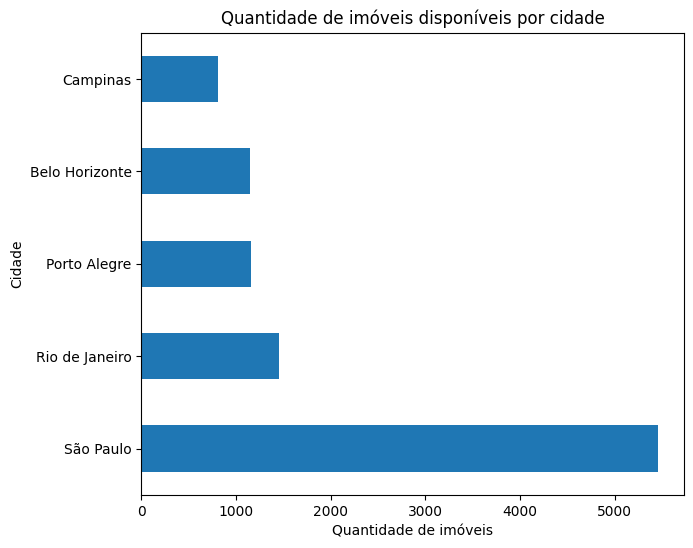

In [ ]:
houses_avble = houses_inliers['City'].value_counts()
houses_avble.plot(kind='barh')
plt.title('Quantidade de imóveis disponíveis por cidade')
plt.xlabel('Quantidade de imóveis')
plt.ylabel('Cidade')



*   Agora calcularemos o valor médio para alugar um imóvel agrupado por cidade.



In [ ]:
#Qual valor total médio para se alugar um imóvel agrupado por cidade?

Mean_rent = houses_inliers.groupby('City')['Rent Amount (R$)'].mean().sort_values().round(2)

Text(0, 0.5, 'Cidade')

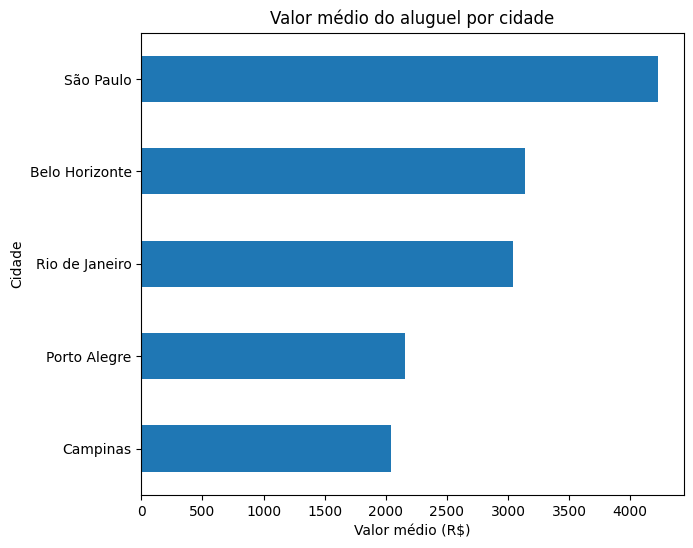

In [ ]:
Mean_rent.plot(kind='barh')
plt.title('Valor médio do aluguel por cidade')
plt.xlabel('Valor médio (R$)')
plt.ylabel('Cidade')

In [ ]:
mean_rent = Mean_rent.reset_index()

In [ ]:
mean_rent_SP = mean_rent[mean_rent['City'] == 'São Paulo']['Rent Amount (R$)']
print(f'O valor médio do aluguel praticado na cidade de São Paulo é R${mean_rent_SP.to_string(index=False)}.')

O valor médio do aluguel praticado na cidade de São Paulo é R$4226.74.


* Sabemos que São Paulo tem o maior valor médio de locação, enquanto Campinas tem o menor, o que é muito visto nos dias atuais ao comparar aluguel de capitais com cidades do interior. Para aprofundarmos ainda mais no cenário imobiliário deste dataset, vamos agrupar os imóveis por faixas de áreas e identificar quantos imóveis cada cidade tem disponível para locação em cada faixa de área.

In [ ]:
faixas = np.array([0,100,200,300,400])
faixas_area = pd.cut(houses_inliers['Area'],faixas)
faixas_area

0          (0, 100]
1        (300, 400]
2          (0, 100]
3          (0, 100]
4          (0, 100]
            ...    
10687      (0, 100]
10688    (200, 300]
10689      (0, 100]
10690    (100, 200]
10691      (0, 100]
Name: Area, Length: 10020, dtype: category
Categories (4, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400]]

In [ ]:
city_area = houses_inliers.groupby(['City',faixas_area])
areas = city_area.size().unstack(0)
areas['Total'] = areas.sum(1)
areas

City,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,Total
Area,,,,,,
"(0, 100]",605,560,861,1007,2882,5915
"(100, 200]",308,160,201,361,1452,2482
"(200, 300]",159,67,62,76,866,1230
"(300, 400]",72,20,32,15,254,393


In [ ]:
total =  areas['Total']
total

Area
(0, 100]      5915
(100, 200]    2482
(200, 300]    1230
(300, 400]     393
Name: Total, dtype: int64

In [ ]:
result = areas.div(total, axis=0)
proportion = result.drop('Total', axis=1).round(2)
proportion

City,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
Area,,,,,
"(0, 100]",0.10,0.09,0.15,0.17,0.49
"(100, 200]",0.12,0.06,0.08,0.15,0.59
"(200, 300]",0.13,0.05,0.05,0.06,0.70
"(300, 400]",0.18,0.05,0.08,0.04,0.65


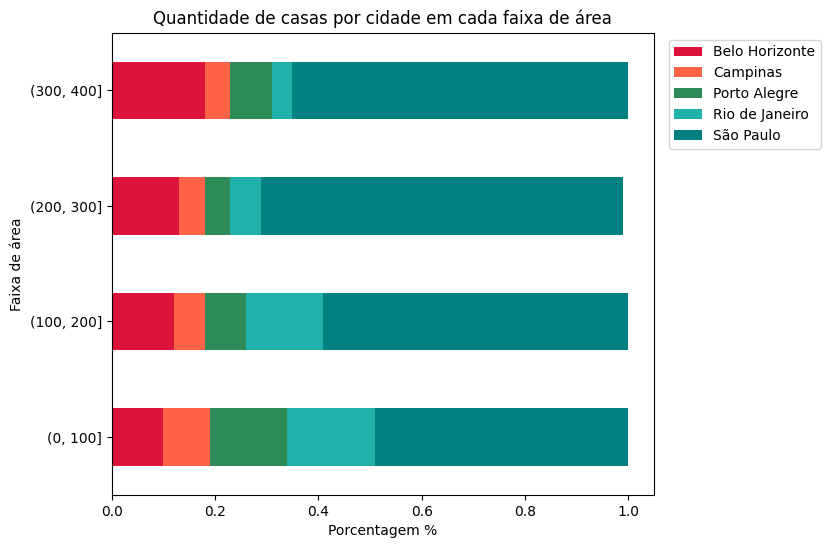

In [ ]:
plt.rcParams['figure.figsize'] = [7,6]
colors = ('crimson','tomato','seagreen','lightseagreen','teal')
proportion.plot(kind='barh',stacked=True, color=colors,mark_right = True)
plt.xlabel('Porcentagem %')
plt.ylabel('Faixa de área')
plt.title('Quantidade de casas por cidade em cada faixa de área')
plt.legend(loc='upper right',bbox_to_anchor=(1.32,1))
plt.show()

* Além de maior valor médio de aluguel, São Paulo também lidera na cidade com maior quantidade disponível de casas por faixa de área. Mas ao analisar média de cômodos, banheiros e vagas de estacionamento, podemos identificar uma distribuição simétrica conforme o mapa de cor abaixo, o que indica uma possível forte correlação de cômodos, banheiros e vagas de estacionamento com as faixas de área.

In [ ]:
#Média dos quartos, banheiros e vagas de estacionamento
rooms_bath_parking = ['Rooms','Bathroom','Parking Spaces']
rooms_bath_parking_mean = city_area[rooms_bath_parking].mean().round(0).unstack(0)

#Função para formatar valor
def formatar_valor(valor):
    return f'{valor:.0f}'

#Visualização por gráfico
cm1 = sns.light_palette('seagreen',as_cmap= True)
cm2 = sns.light_palette('tomato',as_cmap= True)
cm3 = sns.light_palette('teal',as_cmap= True)

(rooms_bath_parking_mean.style
 .format(formatar_valor)
 .background_gradient(cmap=cm1,subset=['Rooms'])
 .background_gradient(cmap=cm2,subset=['Bathroom'])
 .background_gradient(cmap=cm3,subset=['Parking Spaces'])
 .highlight_max(color=None)
 .set_properties(**{'text-align':'right'})
 .set_table_styles([dict(selector = 'th', props=[('text-align','left')])])
 .set_caption("As maiores médias possuem cores mais intensas e estão relacionados com a cidade em cada característica.")
)

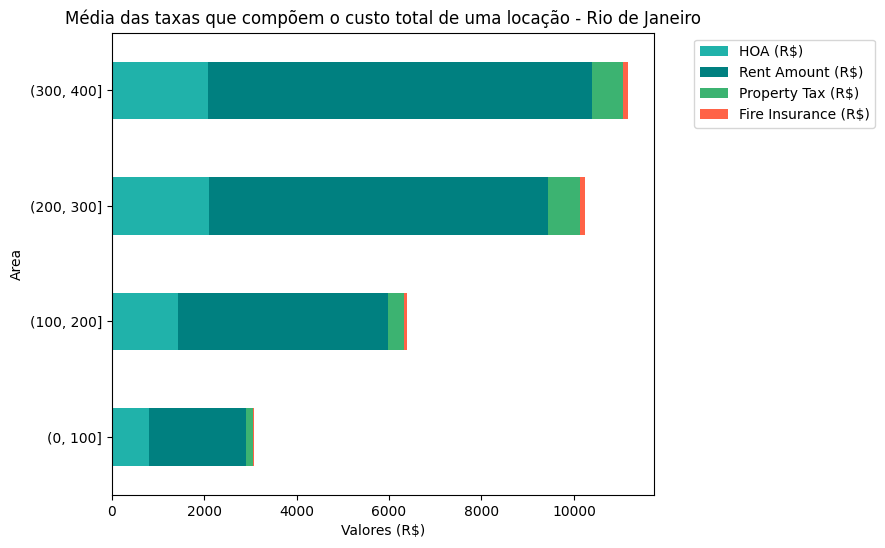

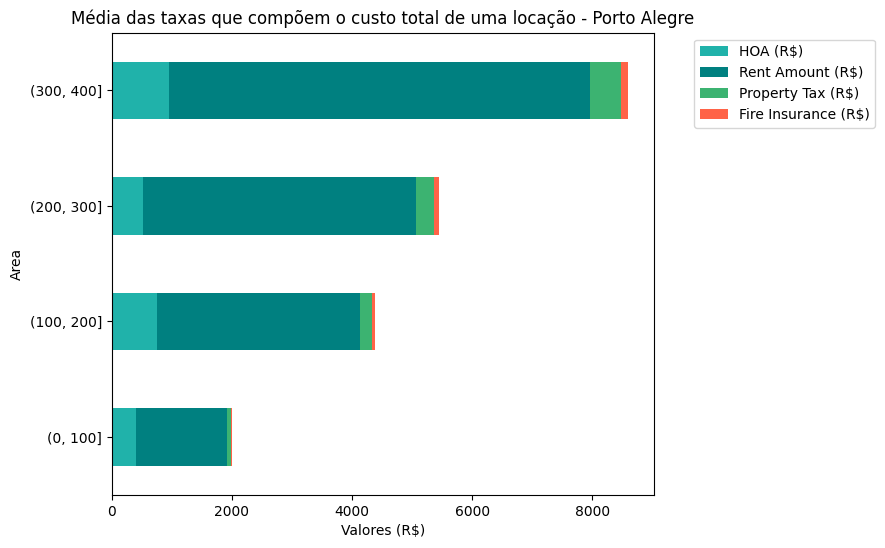

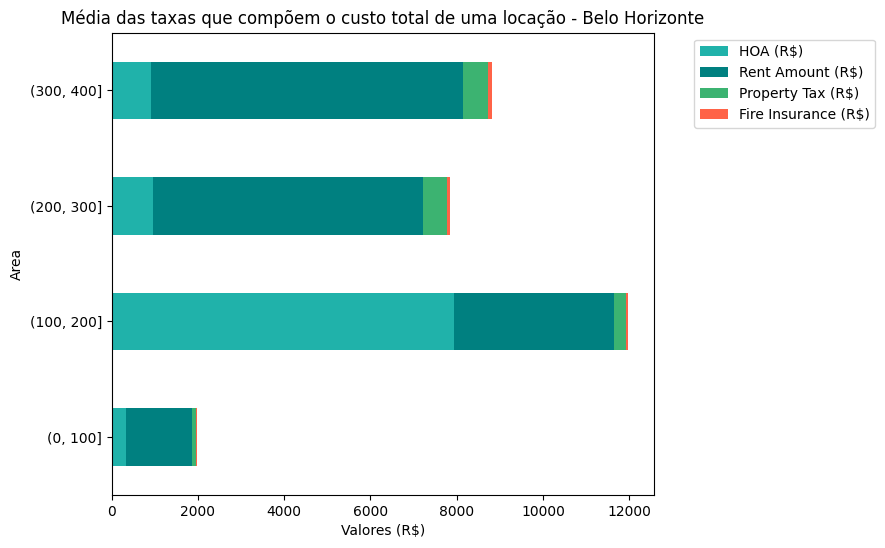

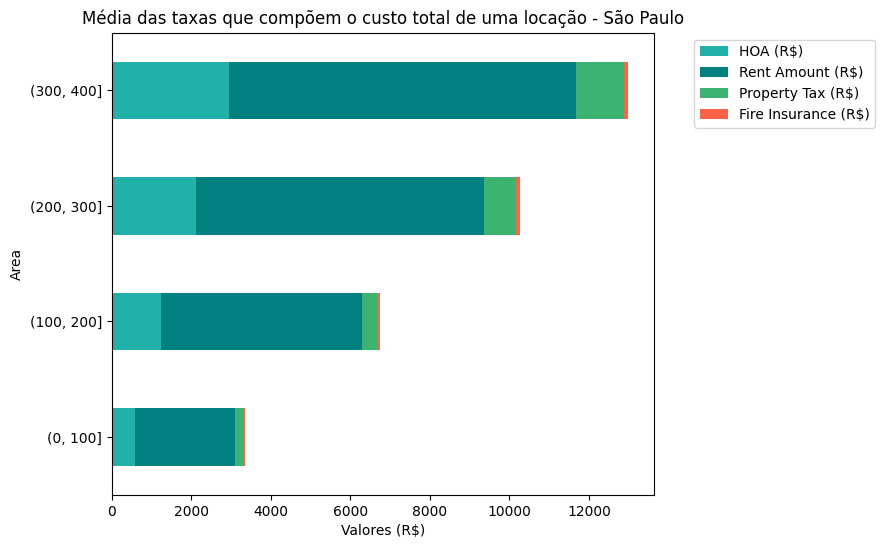

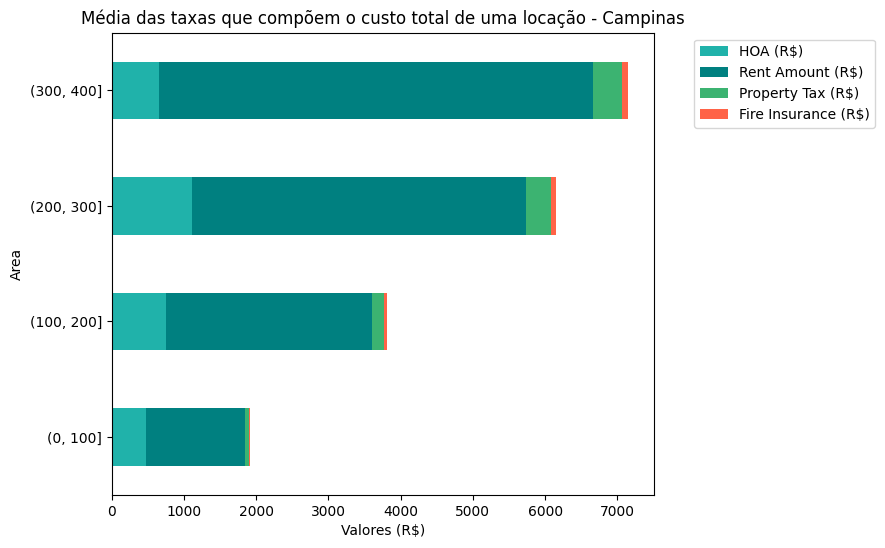

In [ ]:
#Média de cada valor que engloba custo total

total_cost = ['HOA (R$)','Rent Amount (R$)','Property Tax (R$)','Fire Insurance (R$)']
total_cost_mean = city_area[total_cost].mean()

#Visualização por gráfico de barras por cidade
%matplotlib inline

city_cost = set(houses_inliers['City'])

colors = ('lightseagreen','teal','mediumseagreen','tomato')

for i in city_cost:
  total_cost_mean.loc[i].plot.barh(stacked=True, color=colors)
  plt.legend(loc='upper right',bbox_to_anchor=(1.42,1))
  plt.xlabel('Valores (R$)')

  plt.title('Média das taxas que compõem o custo total de uma locação - ' + i)

# Aplicando Método de Pearson para identificar correlação entre as variáveis e concluindo o estudo

In [ ]:
#Correlação entre todas as variáveis utilizando Método de Pearson
columns_out = ['City','Animal','Furniture']
var_houses = houses_inliers.drop(columns_out, axis=1)
var_houses.loc[var_houses['Floor'] == '-', 'Floor'] = 0

corr_houses = var_houses.corr(method='pearson')
corr_houses

,Area,Rooms,Bathroom,Parking Spaces,Floor,HOA (R$),Rent Amount (R$),Property Tax (R$),Fire Insurance (R$),Total (R$)
Area,1.000000,0.747598,0.778938,0.682619,-0.032029,0.038645,0.656276,0.071568,0.680610,0.168377
Rooms,0.747598,1.000000,0.702386,0.586252,-0.040019,0.006654,0.483334,0.047772,0.503803,0.102260
Bathroom,0.778938,0.702386,1.000000,0.668370,0.058599,0.055814,0.625328,0.076439,0.628011,0.180077
Parking Spaces,0.682619,0.586252,0.668370,1.000000,0.035629,0.009291,0.525826,0.066029,0.539572,0.115837
Floor,-0.032029,-0.040019,0.058599,0.035629,1.000000,0.015955,0.137996,0.017388,0.085116,0.043179
HOA (R$),0.038645,0.006654,0.055814,0.009291,0.015955,1.000000,0.038921,0.006099,0.033694,0.963011
Rent Amount (R$),0.656276,0.483334,0.625328,0.525826,0.137996,0.038921,1.000000,0.072584,0.987433,0.230514
Property Tax (R$),0.071568,0.047772,0.076439,0.066029,0.017388,0.006099,0.072584,1.000000,0.069906,0.207223
Fire Insurance (R$),0.680610,0.503803,0.628011,0.539572,0.085116,0.033694,0.987433,0.069906,1.000000,0.222820
Total (R$),0.168377,0.102260,0.180077,0.115837,0.043179,0.963011,0.230514,0.207223,0.222820,1.000000


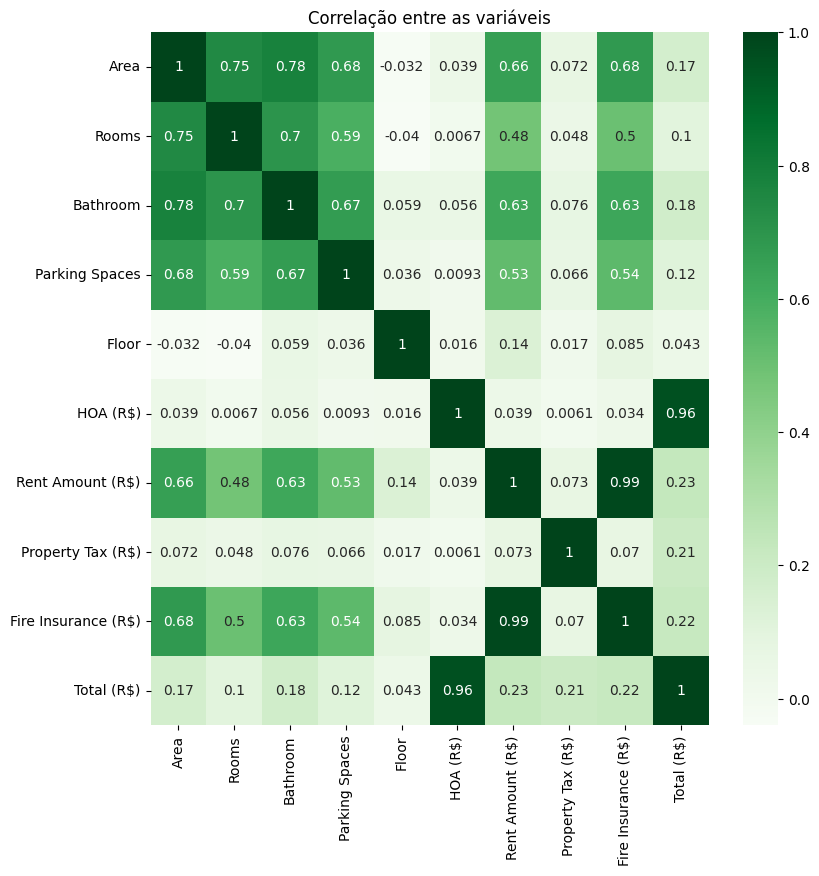

In [ ]:
#Criando mapa de calor para melhor visualização
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(corr_houses, annot = True, annot_kws = {'size':10},cmap='Greens')
plt.title('Correlação entre as variáveis')
plt.show()

* Como era suspeito, com o Método de Pearson e o mapa de calor que permitem identificar as correlações entre as variáveis, podemos confirmar que há alta correlação entre áreas, quartos, banheiros e vagas de estacionamento. Identificamos também forte correlação entre Seguro Incêndio e Valor do Aluguel e entre Valor do Condomínio e Custo Total da Locação.

* Portanto, conclui-se que a cidade de São Paulo no ano de 2020 (ano em que os dados tratados e analisados foram coletados) tinha um grande mercado imobiliário com um pouco mais de 5.000 casas disponíveis, e um valor médio de aluguel de R$4.226,74. Não somente o valor médio do aluguel liderava entre as cidades, como também o valor médio de cada custo que fazia parte do valor total da locação de um imóvel, sendo o Seguro Incêndio o menor custo médio e o Valor do Aluguel o maior custo médio.

* Era esperado encontrar uma correlação considerável do Valor do Aluguel com as variáveis áreas, quartos, banheiros e vagas de estacionamento, contudo o mercado imobiliário tem outras variáveis não abordadas neste dataset, mais complexas como bairros e cenários socio-econômicos, que caso os dados tivessem sido coletados, exigiria uma análise de dados mais robusta e bem tratada.